## MOVIE CORRELATION PROJECT 


In [40]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


In [41]:
#Read in the data
df=pd.read_csv(r'C:\Users\Use\Downloads\correlation\movies.csv')

### Data Understanding

In [42]:
#let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [43]:
#checking for the last 5 rows
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [44]:
# Getting the shape of the dataset
print(f"The shape of the dataset is {df.shape}")


The shape of the dataset is (7668, 15)


7668 rows and 15 columns.


In [45]:
# Let's look for any missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))


name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


There are missing values

In [46]:
# finding the summary statistics
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


### Data Cleaning



In [47]:
# Handle missing values in specific columns
df.dropna(subset=['rating'], inplace=True)

#filling the missing vakues
df['released'].fillna(df['released'].mode()[0], inplace=True)
df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(0, inplace=True)
df['writer'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)
df['company'].fillna('Unknown', inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

# Check for missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


There are no missing values


In [48]:
# data types for our colums
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

There are type objects, floats and integers

In [49]:
# changing budget and gross to integers
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [50]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [51]:
# create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [52]:
#sorting values by gross
df.sort_values(by=['gross'], inplace=False, ascending=False) 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [53]:
# geeting all the data
pd.set_option('display.max_rows', None)

In [54]:
# Drop the duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


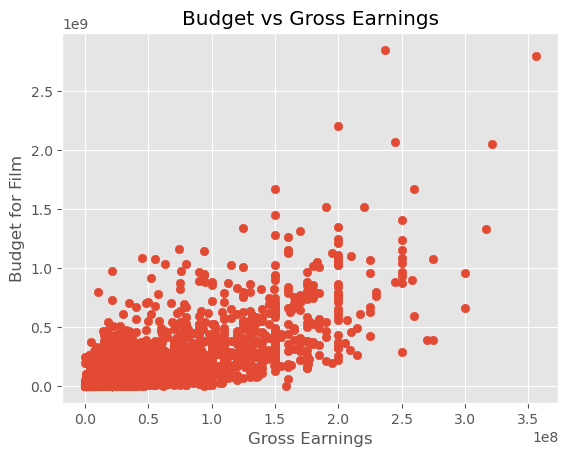

In [55]:
# scatter vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

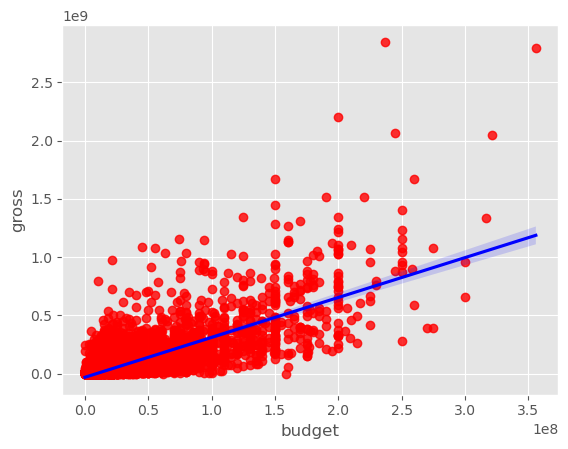

In [56]:
# let's do a reg plot
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [57]:
numeric_df=['budget', 'gross', 'runtime', 'score', 'votes', 'year']

In [58]:
# Assuming you have a DataFrame named 'df' with the appropriate columns

# Specify the names of the numeric columns
numeric_columns = ['budget', 'gross', 'runtime', 'score', 'votes', 'year']

# Select the numeric columns from the original DataFrame
numeric_df = df[numeric_columns].copy()

# Calculate the correlation using the selected numeric columns
correlation = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
           budget     gross   runtime     score     votes      year
budget   1.000000  0.745674  0.273808  0.062946  0.459227  0.295052
gross    0.745674  1.000000  0.244437  0.187834  0.632333  0.262178
runtime  0.273808  0.244437  1.000000  0.400885  0.309592  0.121505
score    0.062946  0.187834  0.400885  1.000000  0.411957  0.103583
votes    0.459227  0.632333  0.309592  0.411957  1.000000  0.226840
year     0.295052  0.262178  0.121505  0.103583  0.226840  1.000000


high correlation between budget and gross



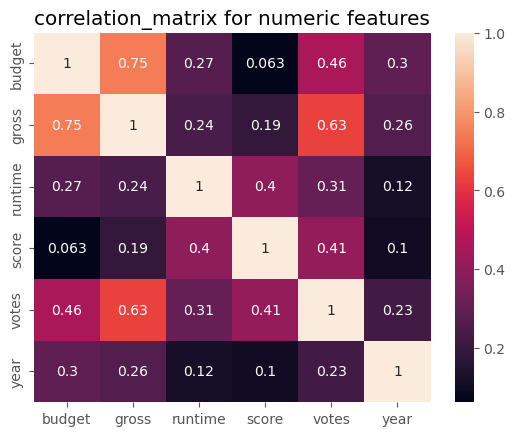

In [59]:
#plotting heatmap
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation_matrix for numeric features')
plt.show()

High correlation between gross and budget colums

In [60]:
# Assuming you have a DataFrame named 'df'

# Create a copy of the DataFrame
df_numerized = df.copy()

# Iterate over each column in the DataFrame
for col_name in df_numerized.columns:
    # Check if the column is non-numeric (object type)
    if df_numerized[col_name].dtype == 'object':
        # Convert the non-numeric column to category type
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # Numerize the category column
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6520,6,6,1980,1687,8.4,927000.0,2551,3966,1025,54,19000000,46998772,2278,146.0,1980
1,5511,6,1,1980,1474,5.8,65000.0,2239,1615,316,55,4500000,58853106,713,104.0,1980
2,5084,4,0,1980,1753,8.7,1200000.0,1095,2538,1713,55,18000000,538375067,1509,124.0,1980
3,283,4,4,1980,1474,7.7,221000.0,1282,1978,2203,55,3500000,83453539,1773,88.0,1980
4,1017,6,4,1980,1525,7.3,108000.0,1039,513,398,55,6000000,39846344,1740,98.0,1980


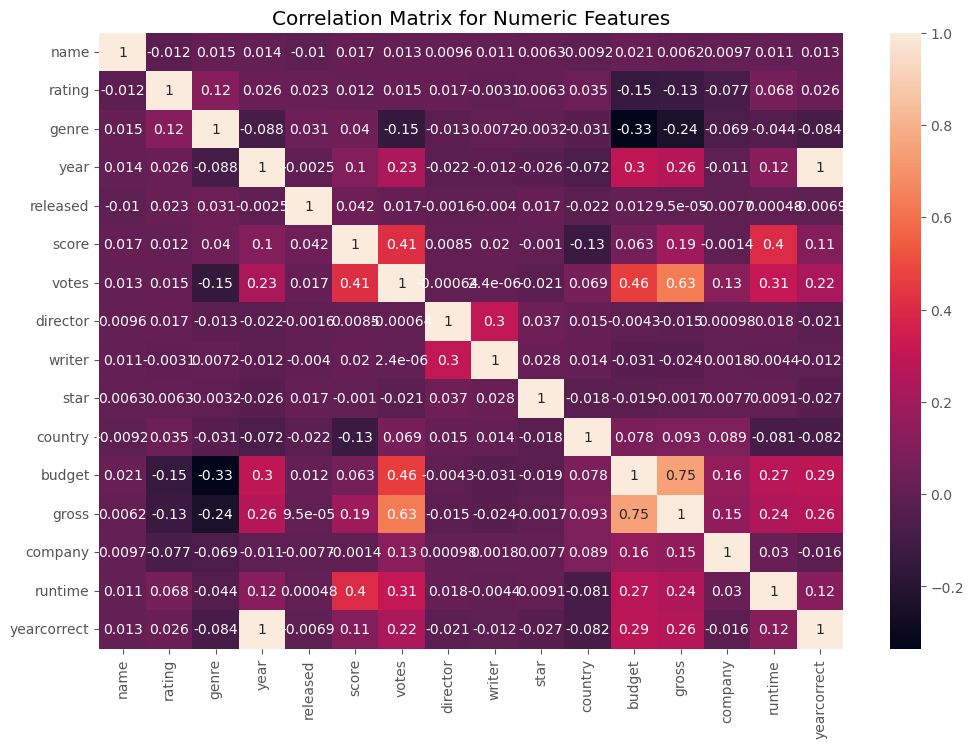

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df_numerized'

# Calculate the correlation matrix
correlation_matrix = df_numerized.corr(method='pearson')

# Create a larger figure for the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()


In [62]:
#getting the correlation
df_numerized.corr()
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6520,6,6,1980,1687,8.4,927000.0,2551,3966,1025,54,19000000,46998772,2278,146.0,1980
1,5511,6,1,1980,1474,5.8,65000.0,2239,1615,316,55,4500000,58853106,713,104.0,1980
2,5084,4,0,1980,1753,8.7,1200000.0,1095,2538,1713,55,18000000,538375067,1509,124.0,1980
3,283,4,4,1980,1474,7.7,221000.0,1282,1978,2203,55,3500000,83453539,1773,88.0,1980
4,1017,6,4,1980,1525,7.3,108000.0,1039,513,398,55,6000000,39846344,1740,98.0,1980


In [63]:
#getting the corr pairs
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.012160
      genre       0.015087
      year        0.013595
      released   -0.010149
dtype: float64

In [64]:
#sorting values
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.334932
budget  genre    -0.334932
genre   gross    -0.240279
gross   genre    -0.240279
votes   genre    -0.148255
dtype: float64

In [65]:
#getting the high correalted pairs
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.632333
votes        gross          0.632333
gross        budget         0.745674
budget       gross          0.745674
yearcorrect  year           0.997394
year         yearcorrect    0.997394
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

votes and budget  have the highest correlation to gross earnings

company has low correlation